**This script is a precursor for 2023-01-11-plotting-trap-nkl.ipynb**

For the generation of actual data tables, refer to 2023-02-10.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

from scipy.stats import mannwhitneyu, shapiro

# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, CustomJS, Button
# from bokeh.io import output_notebook
# from bokeh.transform import factor_cmap, linear_cmap
# from bokeh.palettes import Category20
# from bokeh.layouts import column
# output_notebook()
from itertools import repeat, cycle

%load_ext rpy2.ipython

In [2]:
# https://cloud.r-project.org can be used to install Cran packages.

In [3]:
%%R
library(ggplot2)
library(dplyr)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
date_of_processing = "2023-02-10"

# Loading & Configuration

In [5]:
# experiment_path = Path("./results/aa5b6af/")
# results = pd.read_csv(experiment_path / "archive.csv.gz")
results = pd.concat([
    pd.read_csv("./results/2022-12-13-scalability-gomea-trap-re-149d6ac-archive.csv.gz"),
    pd.read_csv("./results/2022-12-13-scalability-ecga-trap-re-149d6ac-2aa20e4-archive.csv.gz"),
    pd.read_csv("./results/2022-12-13-scalability-ga-trap-re-149d6ac-archive.csv.gz"),
    # gomea - imm
    pd.read_csv("./results/2023-01-11-imm-gomea-trap-f418675-archive.csv.gz"),
])

remapping_algorithm_type = {
    "sync": "ecga-sync",
    "async-throttled": "ecga-async-th",
}
results["algorithm_type"] = results["algorithm_type"].replace(remapping_algorithm_type)

problem_columns = ["problem", "l", "runtime_type"]
approach_columns = ["replacement_strategy", "algorithm_type", "tournament_size"]
run_columns = ["seed"]

In [21]:
results

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,l,vtr,instance,replacement_strategy,tournament_size,runtime_type,algorithm_type,population_size,Unnamed: 0.1
0,0,44.0,38.62,-21.0,1.0,NaN,0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
1,1,44.0,48.52,-22.0,2.0,1.0,0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
2,2,44.0,52.48,-26.0,3.0,2.0,0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
3,3,421.0,441.62,-27.0,4.0,3.0,0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
4,4,475.0,490.14,-28.0,5.0,4.0,0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37635,20,10778.0,1522.00,-46.0,21.0,20.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37636,21,10853.0,1532.10,-47.0,22.0,21.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37637,22,10980.0,1545.00,-48.0,23.0,22.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37638,23,10988.0,1548.16,-49.0,24.0,23.0,0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN


In [6]:
def relabel(df):
    # Relabeling
    # - Approach
    df["approach"] = "GA"
    df.loc[df["algorithm_type"].str.contains("ecga"), "approach"] = "ECGA"
    df.loc[df["algorithm_type"].str.contains("gomea"), "approach"] = "GOMEA"
    df.loc[(df["algorithm_type"].str.contains("gomea") & df["algorithm_type"].str.contains("immidiate")), "approach"] = "GOMEA-IMM"
    df["approach"] = pd.Categorical(df["approach"], categories=["GOMEA", "GOMEA-IMM", "ECGA", "GA"], ordered=True)
    # - selection
    df["selection"] = "-"
    df.loc[df["replacement_strategy"] == 5, "selection"] = "steady-state"
    df.loc[df["replacement_strategy"] == 6, "selection"] = "generational"
    df["selection"] = pd.Categorical(df["selection"], categories=["-", "steady-state", "generational"], ordered=True)
    # - CX
    df["cx"] = "-"
    df.loc[df["algorithm_type"].str.contains("subfunction"), "cx"] = "SFX"
    df.loc[df["algorithm_type"].str.contains("uniform"), "cx"] = "UX"
    df.loc[df["algorithm_type"].str.contains("twopoint"), "cx"] = "TPX"
    df["cx"] = pd.Categorical(df["cx"], categories=["-", "UX", "TPX", "SFX"], ordered=True)
    # - (a)sync 
    df["(a)sync"] = "s"
    df.loc[df["algorithm_type"].str.contains("async"), "(a)sync"] = "a"
    df["(a)sync"] = pd.Categorical(df["(a)sync"], categories=["a", "s"], ordered=True)
    # - timing distribution
    df["timing"] = pd.Categorical(df["runtime_type"].replace({
        "cheap-ones-100": "100:1",
        "cheap-ones-10": "10:1",
        "cheap-ones": "2:1",
        "constant": "1:1",
        "expensive-ones": "1:2",
        "expensive-ones-10": "1:10",
        "expensive-ones-100": "1:100",
    }), categories = ["100:1", "10:1", "2:1", "1:1", "1:2", "1:10", "1:100"], ordered=True)

In [7]:
# relabel(results)

In [8]:
results[~np.isnan(results["population_size"])]

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,l,vtr,instance,replacement_strategy,tournament_size,runtime_type,algorithm_type,population_size,Unnamed: 0.1
0,0,44.0,38.62,-21.0,1.0,NaN,0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
1,1,44.0,48.52,-22.0,2.0,1.0,0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
2,2,44.0,52.48,-26.0,3.0,2.0,0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
3,3,421.0,441.62,-27.0,4.0,3.0,0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
4,4,475.0,490.14,-28.0,5.0,4.0,0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37635,20,10778.0,1522.00,-46.0,21.0,20.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37636,21,10853.0,1532.10,-47.0,22.0,21.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37637,22,10980.0,1545.00,-48.0,23.0,22.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37638,23,10988.0,1548.16,-49.0,24.0,23.0,0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN


In [9]:
results[np.isnan(results["population_size"])]

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,l,vtr,instance,replacement_strategy,tournament_size,runtime_type,algorithm_type,population_size,Unnamed: 0.1
15,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,111,50,50,instances/trap__l_50__k_5.txt,5,4,expensive-ones-10,ga-uniform-async,NaN,NaN
16,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,92,50,50,instances/trap__l_50__k_5.txt,5,4,cheap-ones-10,ga-uniform-sync,NaN,NaN
56,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,44,50,50,instances/trap__l_50__k_5.txt,5,4,cheap-ones,ga-uniform-sync,NaN,NaN
78,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,49,50,50,instances/trap__l_50__k_5.txt,5,4,cheap-ones,ga-uniform-sync,NaN,NaN
152,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,91,50,50,instances/trap__l_50__k_5.txt,6,4,expensive-ones,ga-uniform-async,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109618,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,89,50,50,instances/trap__l_50__k_5.txt,5,4,cheap-ones-100,ga-uniform-async,NaN,NaN
109720,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,113,50,50,instances/trap__l_50__k_5.txt,5,4,expensive-ones,ga-uniform-async,NaN,NaN
109721,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,140,50,50,instances/trap__l_50__k_5.txt,6,4,expensive-ones,ga-uniform-async,NaN,NaN
109741,0,NaN,NaN,NaN,NaN,NaN,NaN,deceptive trap,75,50,50,instances/trap__l_50__k_5.txt,6,4,cheap-ones-10,ga-uniform-sync,NaN,NaN


In [10]:
results

,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),problem,seed,l,vtr,instance,replacement_strategy,tournament_size,runtime_type,algorithm_type,population_size,Unnamed: 0.1
0,0,44.0,38.62,-21.0,1.0,NaN,0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
1,1,44.0,48.52,-22.0,2.0,1.0,0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
2,2,44.0,52.48,-26.0,3.0,2.0,0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
3,3,421.0,441.62,-27.0,4.0,3.0,0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
4,4,475.0,490.14,-28.0,5.0,4.0,0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 ...,deceptive trap,54,50,50,instances/trap__l_50__k_5.txt,0,4,expensive-ones-100,gomea-sync,44.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37635,20,10778.0,1522.00,-46.0,21.0,20.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37636,21,10853.0,1532.10,-47.0,22.0,21.0,1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37637,22,10980.0,1545.00,-48.0,23.0,22.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN
37638,23,10988.0,1548.16,-49.0,24.0,23.0,0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,deceptive trap,141,50,50,instances/trap__l_50__k_5.txt,0,4,cheap-ones-10,gomea-immidiate-sync,64.0,NaN


In [11]:
# Compute the hitting evaluation
# def select_hit(df):
#     return df.iloc[df["archive ordinal"].argmax()]
# results_hit = results.groupby(problem_columns + approach_columns + run_columns).apply(select_hit).reset_index(drop=True).fillna(np.inf)
results_hit = results.sort_values("archive ordinal").groupby(problem_columns + approach_columns + run_columns).last().reset_index()#.fillna(np.inf)

In [12]:
results_hit

,problem,l,runtime_type,replacement_strategy,algorithm_type,tournament_size,seed,Unnamed: 0,#evaluations,simulation time (s),objectives,archive ordinal,archive ordinals removed,genotype (categorical),vtr,instance,population_size,Unnamed: 0.1
0,deceptive trap,50,cheap-ones,0,gomea-async,4,42,20,5940.0,451.68,-50.0,21.0,20.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,50,instances/trap__l_50__k_5.txt,24.0,NaN
1,deceptive trap,50,cheap-ones,0,gomea-async,4,43,33,16026.0,495.96,-50.0,34.0,33.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,50,instances/trap__l_50__k_5.txt,60.0,NaN
2,deceptive trap,50,cheap-ones,0,gomea-async,4,44,30,8183.0,471.86,-50.0,31.0,30.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,50,instances/trap__l_50__k_5.txt,32.0,NaN
3,deceptive trap,50,cheap-ones,0,gomea-async,4,45,28,20539.0,501.84,-50.0,29.0,28.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,50,instances/trap__l_50__k_5.txt,76.0,NaN
4,deceptive trap,50,cheap-ones,0,gomea-async,4,46,31,7594.0,500.56,-50.0,32.0,31.0,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,50,instances/trap__l_50__k_5.txt,28.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,deceptive trap,50,expensive-ones-100,6,ga-uniform-sync,4,137,0,NaN,NaN,NaN,NaN,NaN,None,50,instances/trap__l_50__k_5.txt,NaN,NaN
13996,deceptive trap,50,expensive-ones-100,6,ga-uniform-sync,4,138,0,NaN,NaN,NaN,NaN,NaN,None,50,instances/trap__l_50__k_5.txt,NaN,NaN
13997,deceptive trap,50,expensive-ones-100,6,ga-uniform-sync,4,139,0,NaN,NaN,NaN,NaN,NaN,None,50,instances/trap__l_50__k_5.txt,NaN,NaN
13998,deceptive trap,50,expensive-ones-100,6,ga-uniform-sync,4,140,0,NaN,NaN,NaN,NaN,NaN,None,50,instances/trap__l_50__k_5.txt,NaN,NaN


# Required population size

In [16]:
results_hit_f = results_hit# [(results_hit["replacement_strategy"] == 5) | (results_hit["replacement_strategy"] == 6)]
approach_columns_r = approach_columns#["algorithm_type", "replacement_strategy"]
population_size_required = results_hit_f.groupby(problem_columns + approach_columns_r)["population_size"].median()
pt = population_size_required.rename("minimally required population size").reset_index().copy()
relabel(pt)

pt = pt\
    .replace({np.nan: np.inf})\
    .pivot_table(index=["timing"], columns=["selection", "approach", "cx", "(a)sync"], values="minimally required population size", sort=True)\
    .sort_index()\
    .replace({np.inf: np.nan})

tab = pt.style.format(precision=0, na_rep="-")
# tab.to_excel(f"{date_of_processing}-trap-popsize.xlsx")
tab


In [34]:
results_hit_f = results_hit.copy()# [(results_hit["replacement_strategy"] == 5) | (results_hit["replacement_strategy"] == 6)]
approach_columns_r = approach_columns#["algorithm_type", "replacement_strategy"]
results_hit_f["population_size"] = np.where(np.isfinite(results_hit_f["population_size"]), results_hit_f["population_size"], np.inf)
population_size_required = results_hit_f.groupby(problem_columns + approach_columns_r)["population_size"].quantile([0.25, 0.50, 0.75])
population_size_required
# table = population_size_required.reset_index().sort_values(approach_columns_r).pivot(index=problem_columns, columns=approach_columns_r).style.format(precision=0)
pt = population_size_required.rename("minimally required population size").reset_index().rename(columns={"level_6": "quantile"}).copy()
pt["quantile"] = [f"{q:.2f}" for q in pt["quantile"]]
relabel(pt)
# Drop GOMEA-IMM sync - it is identical in behavior.
pt = pt[(pt["approach"] != "GOMEA-IMM") | (pt["(a)sync"] != "s")]
str_c = pt["(a)sync"].astype(str)
str_c[(pt["approach"] == "GOMEA-IMM") & (pt["(a)sync"] == "a")] = "a/i"
str_c[(pt["approach"] == "GOMEA") & (pt["(a)sync"] == "a")] = "a/e"
pt["(a)sync"] = pd.Categorical(str_c, ["a", "a/e", "a/i", "s"], ordered=True)
pt["approach"] = pt["approach"].replace({"GOMEA-IMM": "GOMEA"})

pt = pt\
    .pivot_table(index=["timing"], columns=["selection", "approach", "cx", "(a)sync", "quantile"], values="minimally required population size", sort=False)\
    .sort_index()\
    .replace({np.inf: np.nan})

tab = pt.style.format(precision=0, na_rep="-")
tab.to_excel(f"{date_of_processing}-deceptivetrap-popsize-extended.xlsx")
tab

In [20]:
# Compute normalization transformation for 1:1, and apply it to everything.
# Sidenote: the transformed value did not 
timing_ref = "1:1"
ps = results_hit_f.copy()
relabel(ps)
#
c = ["selection", "approach", "cx", "(a)sync"]
ranges = ps[ps["timing"] == "1:1"].groupby(c)["population_size"].agg([np.median, np.mean, np.std, np.nanmin, np.nanmax]).reset_index()
ps = pd.merge(ps, ranges, on=c)
# 1: Normalize to unit normal - loses scale
# ps["normalized population size"] = (ps["population_size"] - ps["mean"]) / ps["std"]
ps["normalized population size"] = (ps["population_size"] - ps["median"]) / ps["median"]

columns_of_interest = ["problem", "timing", "population_size", "normalized population size", "approach", "cx", "(a)sync", "selection"]
ps = ps[columns_of_interest].sort_values("timing")
ps.to_csv(f"{date_of_processing}-summary-trap.csv.gz")

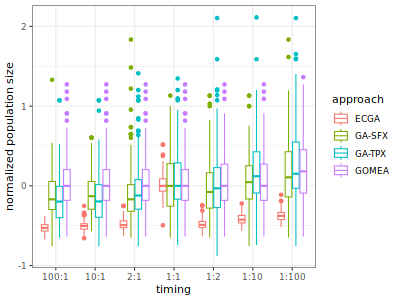

In [41]:
%%R -i ps -w 400 -h 300
ps %>%
    mutate(
  approach = gsub("--", "", paste(approach, cx, sep = "-"))
) %>%
filter(`(a)sync` == "a") %>%
    ggplot(aes(x=`timing`, y=`normalized population size`, color=`approach`)) +
    geom_boxplot() +
    theme_bw()

In [52]:
# Statistical Test against differently timed variants
use_continuity = True
problem_columns_not_runtime = [a for a in problem_columns if a != "runtime_type"]
samples_per_config = results_hit_f.groupby(problem_columns + approach_columns)["population_size"].agg(list).reset_index()
runtime_pairings = pd.merge(samples_per_config, samples_per_config, on=problem_columns_not_runtime + approach_columns)
# runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"]), axis=1)
runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"], use_continuity=use_continuity).pvalue, axis=1)
columns_to_keep = problem_columns_not_runtime + approach_columns + ["runtime_type_x", "runtime_type_y", "statistical_test"]
paired_test_result = runtime_pairings[columns_to_keep].pivot(index=problem_columns_not_runtime + approach_columns + ["runtime_type_x"], columns=["runtime_type_y"]).style
# paired_test_result.to_excel(f"{date_of_processing}-nklandscape-stattest.xlsx")
# paired_test_result

In [90]:
# Statistical Test against differently timed variants
use_continuity = True
problem_columns_not_runtime = [a for a in problem_columns if a != "runtime_type"]
samples_per_config = results_hit_f.groupby(problem_columns + approach_columns)["population_size"].agg(list).reset_index()
relabel(samples_per_config)
samples_per_config["timing"] = pd.Categorical(samples_per_config["timing"], categories=["100:1", "10:1", "2:1", "1:1", "1:2", "1:10", "1:100"])
relabeled_approach_columns = ["selection", "approach", "cx", "(a)sync"]
runtime_pairings = pd.merge(samples_per_config, samples_per_config, on=problem_columns_not_runtime + relabeled_approach_columns)
# runtime_pairings
# runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"]), axis=1)
runtime_pairings["statistical_test"] = runtime_pairings.apply(lambda r: mannwhitneyu(r["population_size_x"], r["population_size_y"], use_continuity=use_continuity).pvalue, axis=1)
columns_to_keep = problem_columns_not_runtime + relabeled_approach_columns + ["timing_x", "timing_y", "statistical_test"]
paired_test_result = runtime_pairings[columns_to_keep].pivot_table(index=relabeled_approach_columns + ["timing_x"], columns=["timing_y"], values=["statistical_test"])
# paired_test_result.to_excel(f"{date_of_processing}-nklandscape-stattest.xlsx")
paired_test_result_f = paired_test_result.style.format("{:.3f}")
paired_test_result_f = paired_test_result_f.applymap(lambda x: np.where(x < 0.05, "color: red", ""))
paired_test_result_f

In [96]:
success_rate = (results_hit["population_size"] != np.inf).groupby([results_hit[x] for x in (problem_columns + approach_columns_r)]).mean()
table = success_rate.reset_index().sort_values(approach_columns_r).pivot(index=problem_columns, columns=approach_columns_r).style.format(precision=3)
table.to_excel(f"{date_of_processing}-nklandscape-success-rate.xlsx")
table

In [16]:
sample_count = results_hit["population_size"].groupby([results_hit[x] for x in (problem_columns + approach_columns_r)]).count()
table = sample_count.reset_index().sort_values(approach_columns_r).pivot(problem_columns, approach_columns_r).style.format(precision=3)
table.to_excel(f"{date_of_processing}-nklandscape-sample-count.xlsx")
table

# Evaluations required

In [10]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].median()
table = evaluations_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style
table.to_excel(f"{date_of_processing}-nklandscape-evaluations-required-median.xlsx")
table

In [ ]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].quantile(0.95)
evaluations_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style

In [ ]:
evaluations_required = results_hit.groupby(problem_columns + approach_columns)["#evaluations"].quantile([0.05, 0.5, 0.95])
evaluations_required = evaluations_required.unstack().reset_index().rename(columns={
    0.05: "0.05",
    0.50: "0.50",
    0.95: "0.95",
})
evaluations_required["approach"] = evaluations_required["algorithm_type"] + "_" + evaluations_required["replacement_strategy"].map(str) + "_" + evaluations_required["tournament_size"].map(str)
evaluations_required["problem and t"] = evaluations_required["problem"] + "_" + evaluations_required["runtime_type"]

In [ ]:
s = evaluations_required[(evaluations_required["problem"] == "onemax") & (evaluations_required["runtime_type"] == "constant")]

c = Category20[20]

TOOLTIPS = [
    ("approach", "@approach"),
    ("l", "@l"),
    ("#evaluations", "@{0.50}")
]
f = figure(
    tools=["hover"],
    plot_width=800, plot_height=800
)
f.hover.tooltips = TOOLTIPS
# approach_colormapped = factor_cmap(field_name="approach", palette=Category20[20], factors=s["approach"].unique())
for (name, df), color in zip(s.groupby("approach"), cycle(c)):
    cds = ColumnDataSource(df)
    r = f.line(
        source=cds,
        x="l",
        y="0.50",
        color=color,
        line_width=2,
        legend_label = name)
    f.varea(
        source=cds,
        x="l",
        y1="0.95",
        y2="0.05",
        color=color,
        alpha=0.5,
        muted_alpha=0.0,
        legend_label = name
    )

# f.legend.click_policy = "mute"
f.legend.click_policy = "hide"
f.legend.orientation = "vertical"
f.legend.location = "top_left"

b = Button(label='Clear selection')
b.js_on_click(CustomJS(args=dict(cds=cds), code="cds.selected.indices = [];"))
show(f)

# (Simulated) Time required

In [11]:
sim_time_required = results_hit.groupby(problem_columns + approach_columns)["simulation time (s)"].median()
table = sim_time_required.reset_index().sort_values(approach_columns).pivot(problem_columns, approach_columns).style
table.to_excel(f"{date_of_processing}-nklandscape-sim-time-required-median.xlsx")
table

In [ ]:
sim_time_required = results_hit.groupby(problem_columns + approach_columns)["simulation time (s)"].quantile([0.05, 0.5, 0.95])
sim_time_required = sim_time_required.unstack().reset_index().rename(columns={
    0.05: "0.05",
    0.50: "0.50",
    0.95: "0.95",
})
sim_time_required["approach"] = sim_time_required["algorithm_type"] + "_" + sim_time_required["replacement_strategy"].map(str) + "_" + sim_time_required["tournament_size"].map(str)
sim_time_required["problem and t"] = sim_time_required["problem"] + "_" + sim_time_required["runtime_type"]

In [ ]:
s = sim_time_required[(sim_time_required["problem"] == "onemax") & (sim_time_required["runtime_type"] == "constant")]

c = Category20[20]

TOOLTIPS = [
    ("approach", "@approach"),
    ("l", "@l"),
    ("simulation time (s)", "@{0.50}")
]
f = figure(
    tools=["hover"],
    plot_width=800, plot_height=800
)
f.hover.tooltips = TOOLTIPS
# approach_colormapped = factor_cmap(field_name="approach", palette=Category20[20], factors=s["approach"].unique())
for (name, df), color in zip(s.groupby("approach"), cycle(c)):
    cds = ColumnDataSource(df)
    r = f.line(
        source=cds,
        x="l",
        y="0.50",
        color=color,
        line_width=2,
        legend_label = name)
    f.varea(
        source=cds,
        x="l",
        y1="0.95",
        y2="0.05",
        color=color,
        alpha=0.05,
        muted_alpha=0.0,
        legend_label = name
    )

# f.legend.click_policy = "mute"
f.legend.click_policy = "hide"
f.legend.orientation = "vertical"
f.legend.location = "top_left"

show(f)

# (Simulated) CPU Time required
As the previous metric can be minimized by evaluating the entire search space in parallel.
This metric multiplies by the number of parallel processors (in this case: the population size).
Note that if an approach does not scale perfectly, this score will be worse than single threaded.

In [ ]:
results_hit["simulated cpu time (s)"] = results_hit["simulation time (s)"] * results_hit["population_size"]
sim_cpu_time_required = results_hit.groupby(problem_columns + approach_columns)["simulated cpu time (s)"].mean()
sim_cpu_time_required